In [199]:
import numpy as np
import matplotlib.pyplot as plt

Завантажуємо дані з наданих файлів

In [200]:
def load_data(filepath):
    data = np.loadtxt(filepath, delimiter=';', skiprows=1, usecols=(1, 2))
    x = data[:, 0, np.newaxis]  # Додаємо нову вісь для матричних операцій
    y = data[:, 1]
    return x, y

x_train, y_train = load_data('lab_1_train.csv')
x_test, y_test = load_data('lab_1_test.csv')

Візуалізація даних з тренувального набору

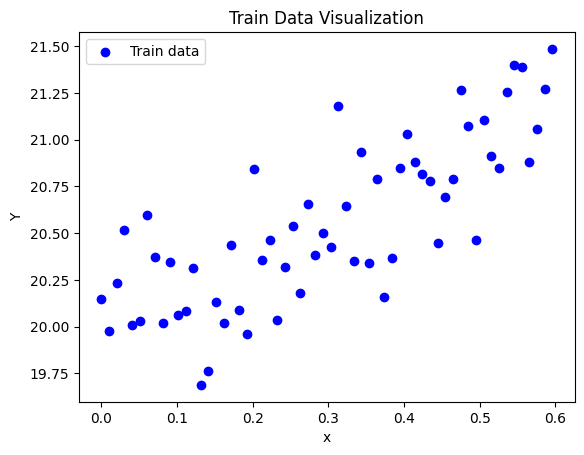

In [201]:
plt.scatter(x_train, y_train, color='blue', label='Train data')
plt.xlabel('x')
plt.ylabel('Y')
plt.title('Train Data Visualization')
plt.legend()
plt.show()

Ініціалізація параметрів моделі

In [202]:
def initialize_parameters():
    w = 0.0
    b = 0.0
    return w, b

Визначення функції втрат та її градієнтів
Для мінімізації MSE використовується градієнтний спуск, який потребує обчислення похідних (градієнтів) функції втрат (середньоквадратична помилка) по вагам w та зсуву b. Ці похідні показують, як потрібно змінити w та b, щоб досягти мінімуму функції втрат.

In [203]:
def compute_cost_and_gradients(x, y, w, b):
    m = len(x) 
    cost = 0.0
    dw = 0.0
    db = 0.0
    
    for i in range(m):
        f_wb = w * x[i] + b             # predict
        cost += (f_wb - y[i]) ** 2      # mean squared error
        dw += 2 * x[i] * (f_wb - y[i])  # gradient of cost function on 'w'
        db += 2 * (f_wb - y[i])         # gradient of cost function on 'b'
        
    cost /= m
    dw /= m
    db /= m
    
    return cost, dw, db

Реалізація градієнтного спуску, відповідно оновлюємо вагу та зсув за формулами:
 

$w = w - \alpha  * \dfrac{\delta MSE}{\delta w} $

$b = b - \alpha  * \dfrac{\delta MSE}{\delta b} $

Також виводимо на заданих епохах значення функції втрат, ваг, зсуву; перевіряємо збіжність

In [204]:
def gradient_descent(x, y, w, b, learning_rate, epochs, tolerance=1e-6):
    costs = []
    cost_prev = float('inf')  # Ініціалізуємо попереднє значення функції втрат як нескінченність

    for i in range(epochs):
        cost, dw, db = compute_cost_and_gradients(x, y, w, b)
        
        w -= learning_rate * dw     
        b -= learning_rate * db
        
        if i % 10 == 0 or i == epochs - 1:
            costs.append(cost)
            print(f'Epoch {i}, Cost: {cost}, w: {w}, b: {b}')

        # Перериваємо цикл, якщо зміна в функції втрат менша за заданий поріг
        if np.abs(cost_prev - cost) < tolerance:
            print(f'Algorithm converged after {i} epochs')
            break
        
        cost_prev = cost

    
    return w, b, costs

Тренування моделі

In [205]:
w, b = initialize_parameters()
w, b, costs = gradient_descent(x_train, y_train, w, b, learning_rate=0.05, epochs=1000, tolerance=1e-4)

Epoch 0, Cost: [422.47740188], w: [0.61839067], b: [2.05495632]
Epoch 10, Cost: [42.32065519], w: [4.03175059], b: [13.56166268]
Epoch 20, Cost: [4.61285283], w: [5.03777841], b: [17.20572505]
Epoch 30, Cost: [0.85542794], w: [5.28773623], b: [18.37357327]
Epoch 40, Cost: [0.46478079], w: [5.3014875], b: [18.76119403]
Epoch 50, Cost: [0.40889603], w: [5.24266516], b: [18.90260115]
Epoch 60, Cost: [0.38713548], w: [5.16274086], b: [18.96594941]
Epoch 70, Cost: [0.36964367], w: [5.07787253], b: [19.00419885]
Epoch 80, Cost: [0.35341246], w: [4.9931006], b: [19.03403889]
Epoch 90, Cost: [0.3380979], w: [4.90996632], b: [19.06073839]
Epoch 100, Cost: [0.32362266], w: [4.82891046], b: [19.08596994]
Epoch 110, Cost: [0.3099382], w: [4.75002853], b: [19.11027345]
Epoch 120, Cost: [0.29700106], w: [4.67330854], b: [19.1338318]
Epoch 130, Cost: [0.28477043], w: [4.5987058], b: [19.15671512]
Epoch 140, Cost: [0.27320769], w: [4.52616646], b: [19.17895768]
Epoch 150, Cost: [0.26227639], w: [4.455

Візуалізація функції втрат

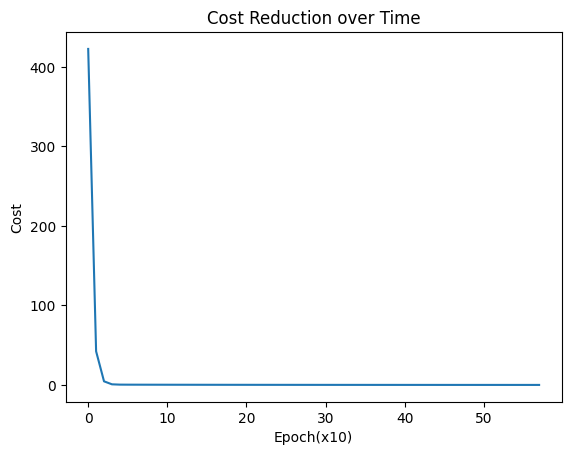

In [206]:
plt.plot(costs)
plt.xlabel('Epoch(x10)')
plt.ylabel('Cost')
plt.title('Cost Reduction over Time')
plt.show()

Обчислення функції втрат на тестових даних

In [207]:
test_cost, _, _ = compute_cost_and_gradients(x_test, y_test, w, b)
print(f'Test Cost: {test_cost}')

Test Cost: [0.1902993]


Візуалізація результатів

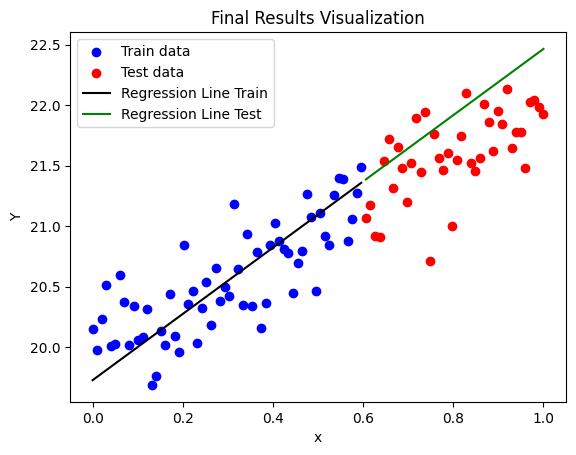

In [208]:
plt.scatter(x_train, y_train, color='blue', label='Train data')
plt.scatter(x_test, y_test, color='red', label='Test data')
plt.plot(x_train, x_train * w + b, color='black', label='Regression Line Train')
plt.plot(x_test, x_test * w + b, color='green', label='Regression Line Test')
plt.xlabel('x')
plt.ylabel('Y')
plt.title('Final Results Visualization')
plt.legend()
plt.show()